In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('synthetic_beverage_sales_data.csv')

In [3]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [4]:
# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [5]:
# 2. Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [6]:
# 3. Remove duplicates if any
df.drop_duplicates(inplace=True)

In [7]:
# 4. Standardize column names (optional, for consistency)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
# 5. Ensure numeric columns are of the correct dtype
numeric_cols = ['unit_price', 'quantity', 'discount', 'total_price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [9]:
# 6. Handle missing numeric values (if any) — for example, fill with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [10]:
# 7. Encode categorical variables (if needed for modeling)
categorical_cols = ['customer_type', 'product', 'category', 'region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
#Cleaned DataFrame
df_encoded.head()

,order_id,customer_id,unit_price,quantity,discount,total_price,order_date,customer_type_B2C,product_Augustiner,product_Bacardi,...,region_Hessen,region_Mecklenburg-Vorpommern,region_Niedersachsen,region_Nordrhein-Westfalen,region_Rheinland-Pfalz,region_Saarland,region_Sachsen,region_Sachsen-Anhalt,region_Schleswig-Holstein,region_Thüringen
0,ORD1,CUS1496,1.66,53,0.10,79.18,2023-08-23,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,ORD1,CUS1496,1.56,90,0.10,126.36,2023-08-23,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,ORD1,CUS1496,1.17,73,0.05,81.14,2023-08-23,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,ORD1,CUS1496,3.22,59,0.10,170.98,2023-08-23,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,ORD1,CUS1496,0.87,35,0.10,27.40,2023-08-23,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis (EDA)

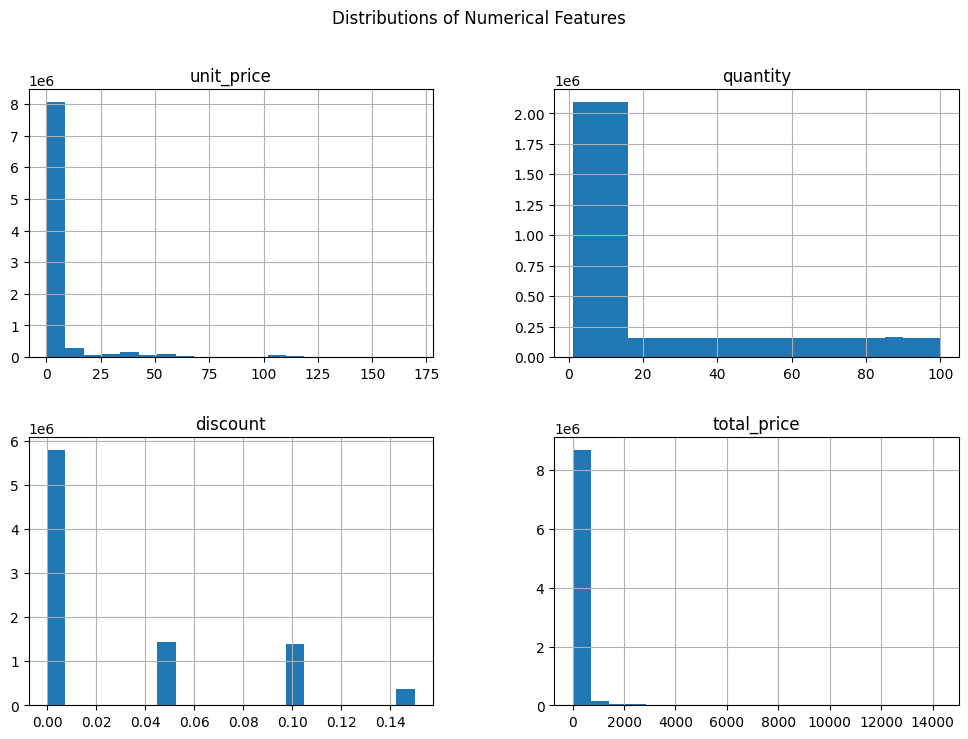

In [12]:
# Distribution of numerical columns
numeric_cols = ['unit_price', 'quantity', 'discount', 'total_price']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions of Numerical Features")
plt.show()

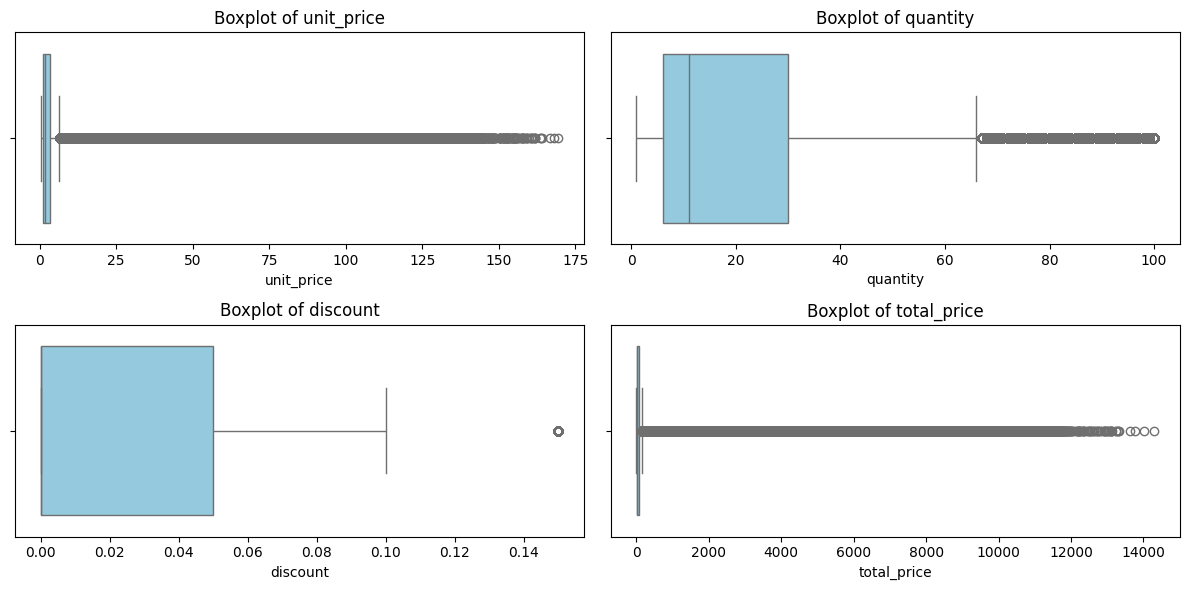

In [13]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

/var/folders/wk/zff9mbq17p7_1zb7p86yc9600000gn/T/ipykernel_30260/1136402947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


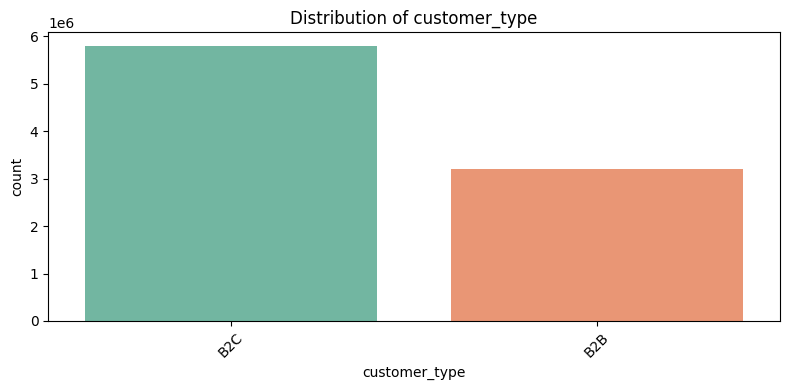

/var/folders/wk/zff9mbq17p7_1zb7p86yc9600000gn/T/ipykernel_30260/1136402947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


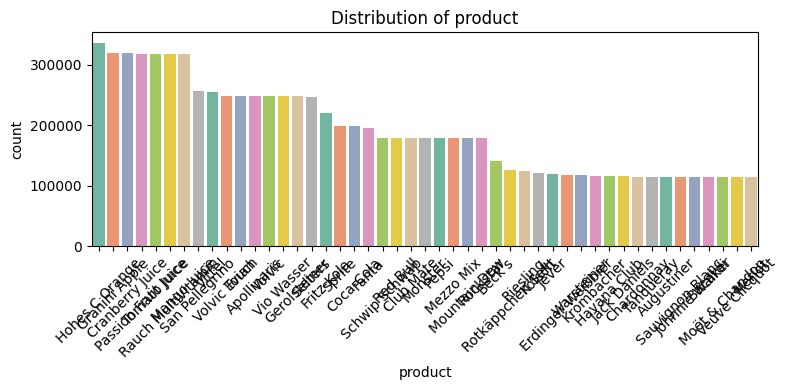

/var/folders/wk/zff9mbq17p7_1zb7p86yc9600000gn/T/ipykernel_30260/1136402947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


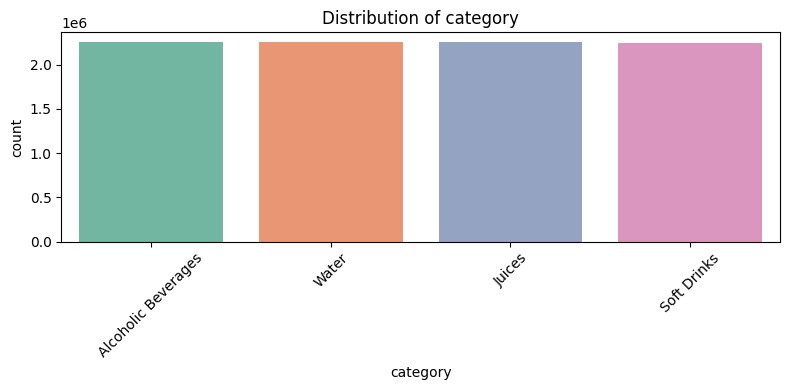

/var/folders/wk/zff9mbq17p7_1zb7p86yc9600000gn/T/ipykernel_30260/1136402947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


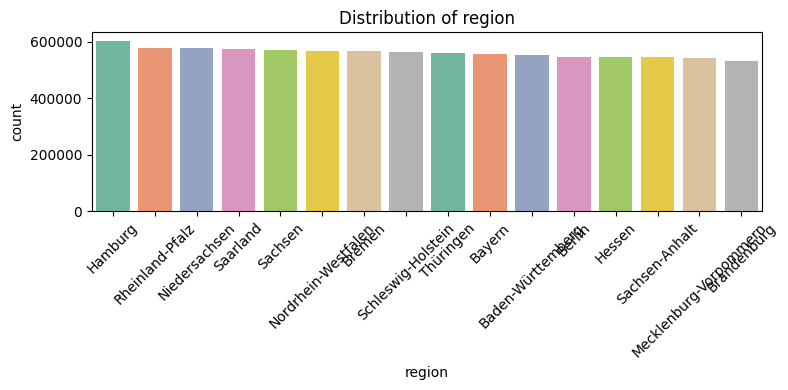

In [14]:
# Count plots for categorical columns
categorical_cols = ['customer_type', 'product', 'category', 'region']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

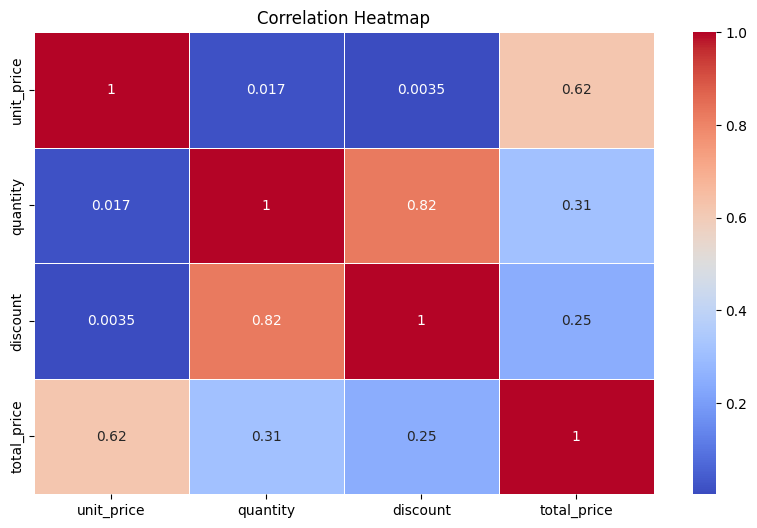

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

/var/folders/wk/zff9mbq17p7_1zb7p86yc9600000gn/T/ipykernel_30260/2728218188.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['total_price'].resample('M').sum()


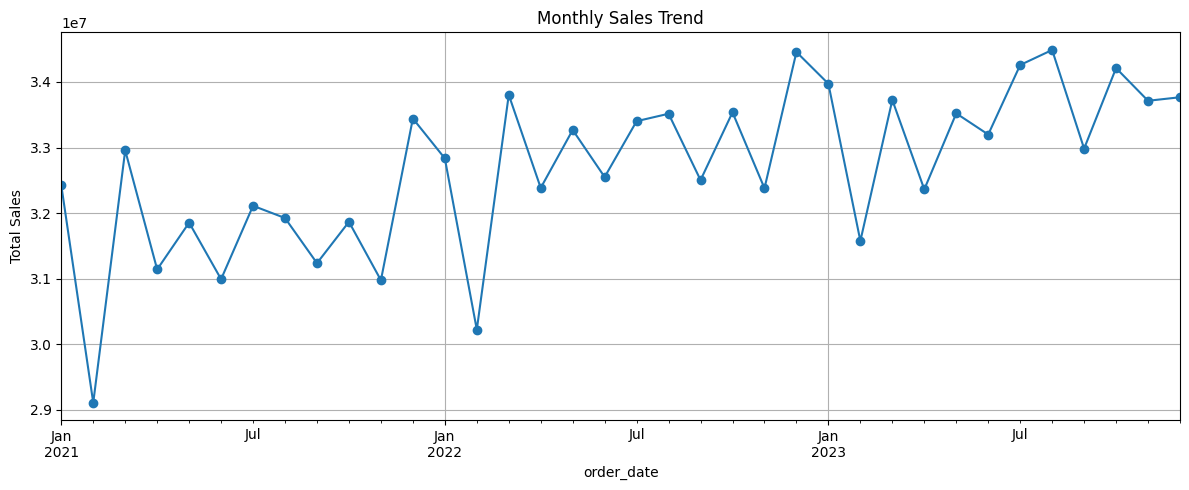

In [16]:
# Time series trends: Sales over time
df.set_index('order_date', inplace=True)
monthly_sales = df['total_price'].resample('M').sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
df.reset_index(inplace=True)

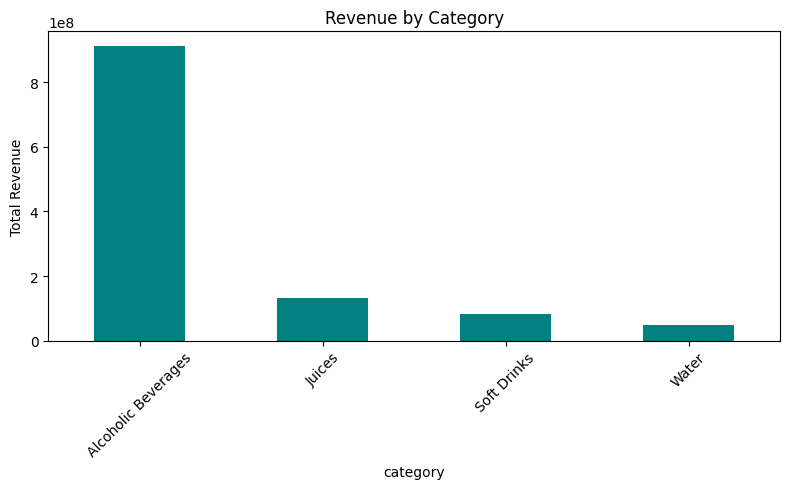

In [17]:
# Category-wise revenue
category_revenue = df.groupby('category')['total_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='teal')
plt.title("Revenue by Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales Prediction Model (Linear Regression)

In [18]:
# Select relevant features
features = ['unit_price', 'quantity', 'discount', 'customer_type', 'product', 'category', 'region']
target = 'total_price'
X = df[features]
y = df[target]

In [19]:
# Define categorical and numeric columns
categorical_cols = ['customer_type', 'product', 'category', 'region']
numeric_cols = ['unit_price', 'quantity', 'discount']

In [20]:
# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns
)

In [21]:
# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Fit the model
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer_type', 'product',
                                                   'category', 'region'])])),
                ('regressor', LinearRegression())])

In [24]:
# Predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R2 Score):", round(r2, 2))

Mean Squared Error (MSE): 132541.12
R-squared (R2 Score): 0.49
